In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Cleaning the Data

In [2]:
# Lab-confirmed cases only
# raw_df = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/who_covid_19_situation_reports/who_covid_19_sit_rep_time_series/who_covid_19_sit_rep_time_series.csv')

# all_provinces = list(raw_df['Province/States'].unique())
# aggregates = ['Confirmed','Deaths']
# other = ['Unspecified*', 'Case on an international conveyance']

# Remove the rows with aggregate data
# clean_df = raw_df.loc[~raw_df['Province/States'].isin(aggregates)]
# clean_df

In [3]:
# Both clinically diagnosed and lab-confirmed cases
# Source: https://github.com/CSSEGISandData/COVID-19/
# confirmed_df = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

# Sum values by Country/Region
# confirmed_cntry_df = confirmed_df.groupby('Country/Region').sum()
# confirmed_cntry_df = confirmed_cntry_df.drop(['Lat','Long'], axis=1)
# confirmed_cntry_df.head()

In [4]:
# Both clinically diagnosed and lab-confirmed cases
# Source: https://www.kaggle.com/c/covid19-global-forecasting-week-1
train_data = os.path.join('resources','train.csv')
train_df = pd.read_csv(train_data)
train_df = train_df[['Province/State','Country/Region','Date','ConfirmedCases','Fatalities']]
train_df['Province/State'] = train_df['Province/State'].fillna('')
train_df.head()

,Province/State,Country/Region,Date,ConfirmedCases,Fatalities
0,,Afghanistan,2020-01-22,0.0,0.0
1,,Afghanistan,2020-01-23,0.0,0.0
2,,Afghanistan,2020-01-24,0.0,0.0
3,,Afghanistan,2020-01-25,0.0,0.0
4,,Afghanistan,2020-01-26,0.0,0.0


## Charting Confirmed Cases

In [5]:
confirmed_df = train_df.pivot_table(index=['Country/Region','Province/State'], columns='Date', values='ConfirmedCases')
confirmed_df = confirmed_df.groupby('Country/Region').sum()
print(len(confirmed_df))
confirmed_df.head()

163


Date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,21.0,22.0,22.0,22.0,24.0,24.0,40.0,40.0,74.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42.0,51.0,55.0,59.0,64.0,70.0,76.0,89.0,104.0,123.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,54.0,60.0,74.0,87.0,90.0,139.0,201.0,230.0,264.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,39.0,39.0,53.0,75.0,88.0,113.0,133.0,164.0
Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0


In [6]:
france_confirmed = confirmed_df.loc[confirmed_df.index == 'France']
france_confirmed

Date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24
Country/Region,,,,,,,,,,,,,,,,,,,,,
France,0.0,0.0,2.0,3.0,3.0,3.0,4.0,5.0,5.0,5.0,...,4520.0,6665.0,7696.0,9102.0,10939.0,12713.0,14412.0,16157.0,20062.0,251.0


### Countries with Highest Number of Confirmed Cases

In [7]:
n = 10
last_day = confirmed_df.columns[-2]
top_confirmed_df = confirmed_df.nlargest(n, last_day)
top_confirmed_df

Date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24
Country/Region,,,,,,,,,,,,,,,,,,,,,
China,533.0,618.0,882.0,1321.0,1921.0,2649.0,5198.0,5692.0,7637.0,9173.0,...,78721.0,78747.0,78769.0,78810.0,78861.0,78946.0,78992.0,79070.0,79158.0,79243.0
Italy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,24747.0,27980.0,31506.0,35713.0,41035.0,47021.0,53578.0,59138.0,63927.0,69176.0
US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3462.0,4592.0,6352.0,7709.0,13571.0,18967.0,25347.0,33083.0,43442.0,53490.0
Spain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7798.0,9942.0,11748.0,13910.0,17963.0,20410.0,25374.0,28768.0,35136.0,39885.0
Germany,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,4.0,5.0,...,5795.0,7272.0,9257.0,12327.0,15320.0,19848.0,22213.0,24873.0,29056.0,32986.0
Iran,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13938.0,14991.0,16169.0,17361.0,18407.0,19644.0,20610.0,21638.0,23049.0,24811.0
France,0.0,0.0,2.0,3.0,3.0,3.0,4.0,5.0,5.0,5.0,...,4520.0,6665.0,7696.0,9102.0,10939.0,12713.0,14412.0,16157.0,20062.0,251.0
"Korea, South",1.0,1.0,2.0,2.0,3.0,4.0,4.0,4.0,4.0,11.0,...,8162.0,8236.0,8320.0,8413.0,8565.0,8652.0,8799.0,8897.0,8961.0,9037.0
Switzerland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2200.0,2200.0,2700.0,3028.0,4075.0,5294.0,6575.0,7245.0,8795.0,9877.0


### First day of Confirmed Case

In [126]:
header = top_confirmed_df.columns
header

Index(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
       '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
       '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
       '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
       '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15',
       '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20',
       '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25',
       '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
       '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
       '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11',
       '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
       '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24'],
      dtype='object', name

In [127]:
for country in confirmed_countries:
    row = list(top_confirmed_df.loc[top_confirmed_df.index == country].values[0])
    value_index = next((i for i, j in enumerate(row) if j.any()), None) 
    country_index = np.where(confirmed_countries == country)
    first_day_value = top_confirmed_df.iloc[country_index[0][0], value_index]
    first_day = np.where(row == first_day_value)
    print(f"{country}")
    print(f"{top_confirmed_df.columns[first_day[0][0]]}")

China
2020-01-22
Italy
2020-01-31
US
2020-02-24
Spain
2020-02-01
Germany
2020-01-27
Iran
2020-02-19
France
2020-01-24
Korea, South
2020-01-22
Switzerland
2020-02-25
United Kingdom
2020-01-31


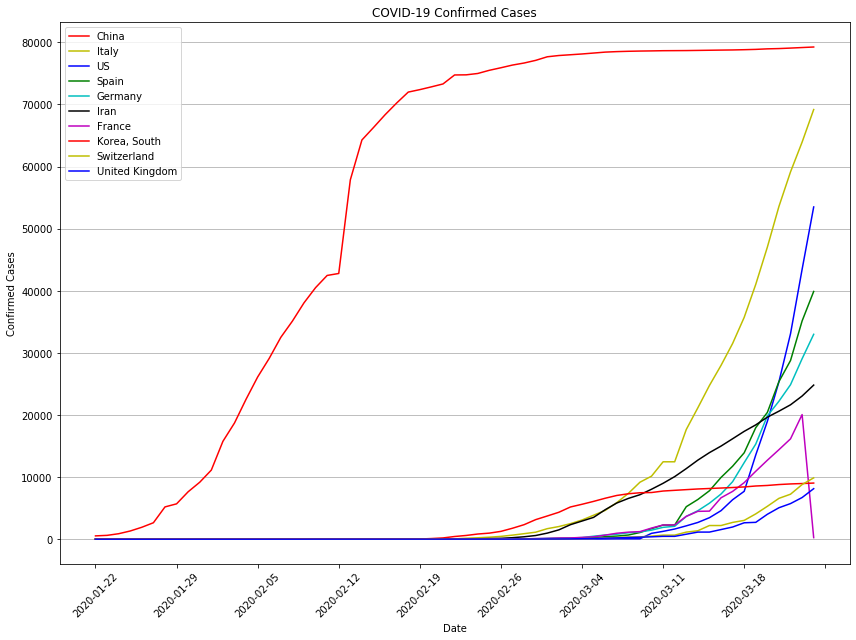

In [8]:
# Plot the data

# x-axis
dates = confirmed_df.columns.tolist()   # dates in string format
days = range(len(dates))                # number of days

# y-axis
confirmed_countries = top_confirmed_df.index      # list of countries
top_confirmed = top_confirmed_df.values.tolist()  # total confirmed cases

fig, ax = plt.subplots(figsize = (12,9))
plt.title("COVID-19 Confirmed Cases")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")

xticks = [day*7 for day in days]
xlabels = dates[0::7]
plt.xticks(xticks, xlabels, rotation=45)

mcolor = ['r','y','b','g','c','k','m',
          'r','y','b','g','c','k','m',]
counter = 0
country_labels = ()

for country in confirmed_countries:
    ax.plot(days, top_confirmed[counter], label = confirmed_countries, color = mcolor[counter], linestyle = '-')

    country_labels += (country,)
    counter += 1
            
    if counter == len(confirmed_countries):
        break
            
plt.legend(country_labels, loc='best')            
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Charting Fatalities

In [9]:
# Source: https://github.com/CSSEGISandData/COVID-19/
# deaths_df = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

# Sum values by Country/Region
# deaths_cntry_df = deaths_df.groupby('Country/Region').sum()
# deaths_cntry_df = deaths_cntry_df.drop(['Lat','Long'], axis=1)
# deaths_cntry_df.head()

In [10]:
fatalities_df = train_df.pivot_table(index=['Country/Region','Province/State'], columns='Date', values='Fatalities')
fatalities_df = fatalities_df.groupby('Country/Region').sum()
print(len(fatalities_df))
fatalities_df.head()

163


Date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,5.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,7.0,9.0,11.0,15.0,17.0,17.0,19.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
france_fatalities = fatalities_df.loc[fatalities_df.index == 'France']
france_fatalities

Date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24
Country/Region,,,,,,,,,,,,,,,,,,,,,
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,91.0,148.0,148.0,148.0,243.0,450.0,562.0,674.0,861.0,1.0


### Countries with Highest Number of Fatalities

In [12]:
n = 10
last_day = fatalities_df.columns[-2]
top_fatalities_df = fatalities_df.nlargest(n, last_day)
top_fatalities_df

Date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24
Country/Region,,,,,,,,,,,,,,,,,,,,,
Italy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1809.0,2158.0,2503.0,2978.0,3405.0,4032.0,4825.0,5476.0,6077.0,6820.0
China,17.0,18.0,25.0,41.0,53.0,79.0,128.0,129.0,166.0,208.0,...,3163.0,3177.0,3190.0,3201.0,3209.0,3213.0,3219.0,3224.0,3233.0,3240.0
Spain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,289.0,342.0,533.0,623.0,830.0,1043.0,1375.0,1772.0,2311.0,2808.0
Iran,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,724.0,853.0,988.0,1135.0,1284.0,1433.0,1556.0,1685.0,1812.0,1934.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,91.0,148.0,148.0,148.0,243.0,450.0,562.0,674.0,861.0,1.0
US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,62.0,84.0,107.0,116.0,197.0,241.0,302.0,413.0,547.0,698.0
United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.0,56.0,56.0,72.0,138.0,178.0,234.0,282.0,336.0,423.0
Netherlands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,24.0,43.0,58.0,77.0,107.0,137.0,180.0,214.0,277.0
Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,17.0,24.0,28.0,44.0,67.0,84.0,94.0,123.0,157.0


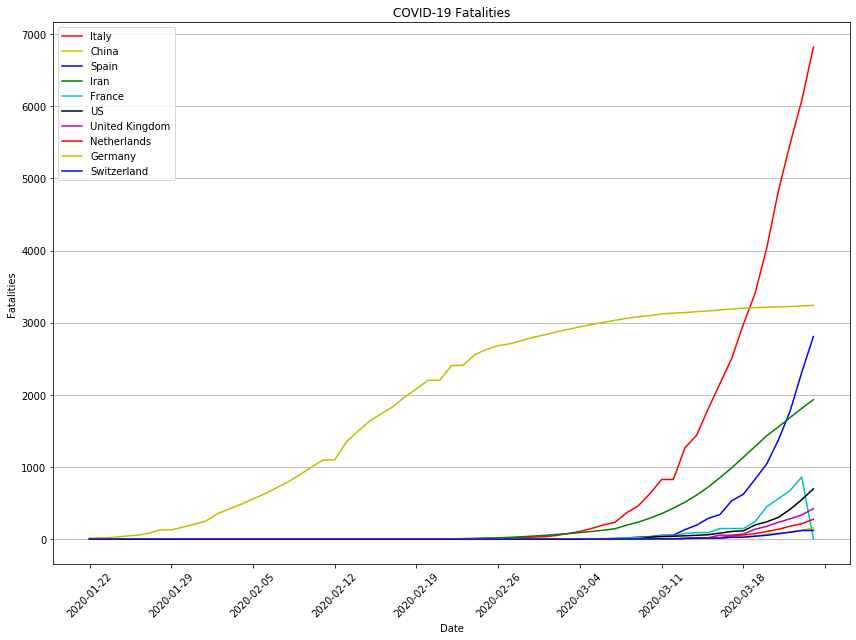

In [71]:
# Plot the data

# x-axis
dates = fatalities_df.columns.tolist()   # dates in string format
days = range(len(dates))                 # number of days

# y-axis
fatalities_countries = top_fatalities_df.index      # list of countries
top_fatalities = top_fatalities_df.values.tolist()  # total fatalities

fig, ax = plt.subplots(figsize = (12,9))
plt.title("COVID-19 Fatalities")
plt.xlabel("Date")
plt.ylabel("Fatalities")

xticks = [day*7 for day in days]
xlabels = dates[0::7]
plt.xticks(xticks, xlabels, rotation=45)

mcolor = ['r','y','b','g','c','k','m',
          'r','y','b','g','c','k','m',]
counter = 0
country_labels = ()

for country in fatalities_countries:
    ax.plot(days, top_fatalities[counter], label = countries, color = mcolor[counter], linestyle = '-')

    country_labels += (country,)
    counter += 1
            
    if counter == len(fatalities_countries):
        break
            
plt.legend(country_labels, loc='best')            
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Population Density (per sqkm) (2018)

In [14]:
# Source: https://data.worldbank.org/indicator/en.pop.dnst
file = os.path.join('resources','population_density.csv')
pop_density = pd.read_csv(file, header=4, usecols=['Country Name','2018'], index_col='Country Name')
pop_density = pop_density.rename(columns={'2018':'Population Density'})
print(len(pop_density))
pop_density.head()

264


,Population Density
Country Name,
Aruba,588.027778
Afghanistan,56.937760
Angola,24.713052
Albania,104.612263
Andorra,163.842553


# Polynomial Regression Model

In [41]:
# Installations you may need to run this notebook
# !pip install keras
# !pip install tensorflow
# !pip install sklearn --upgrade
# !pip install joblib

# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import numpy.polynomial.polynomial as poly

Country: China
Model Score: -3.5815750205455563
Number of confirmed cases 63 days out will be 79700.0.
Country: Italy
Model Score: -0.2695529438986375
Number of confirmed cases 63 days out will be 69900.0.
Country: US
Model Score: -0.11320672896816064
Number of confirmed cases 63 days out will be 54500.0.
Country: Spain
Model Score: -0.17340664544717033
Number of confirmed cases 63 days out will be 40100.0.
Country: Germany
Model Score: -0.17379338284787726
Number of confirmed cases 63 days out will be 33500.0.
Country: Iran
Model Score: -0.3744254252712318
Number of confirmed cases 63 days out will be 24500.0.
Country: France
Model Score: -0.19241219309734348
Number of confirmed cases 63 days out will be 8200.0.
Country: Korea, South
Model Score: -0.6878784662799071
Number of confirmed cases 63 days out will be 9500.0.
Country: Switzerland
Model Score: -0.15301868293737408
Number of confirmed cases 63 days out will be 10100.0.
Country: United Kingdom
Model Score: -0.1389997616405343
N

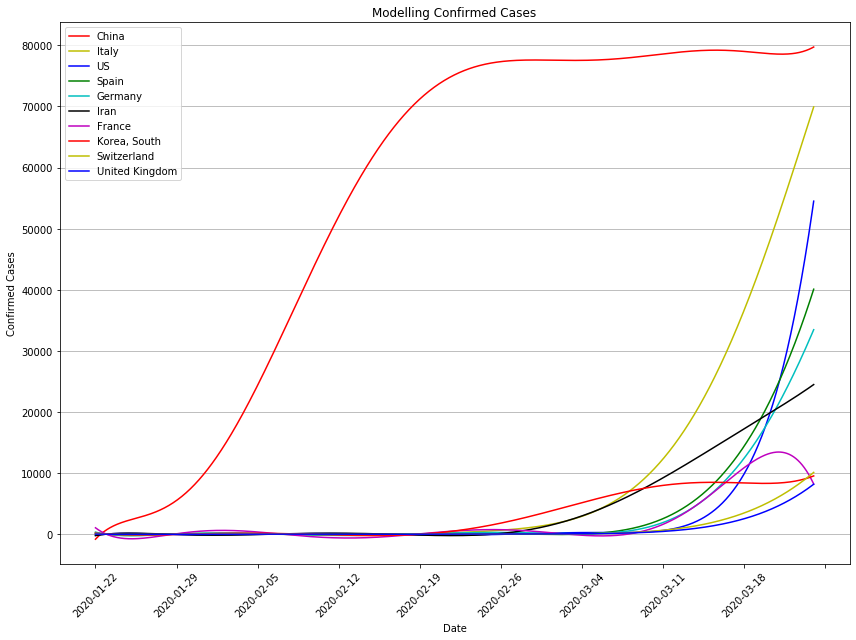

In [89]:
days_out = 63
n_days = days_out - 1   # adjust for index
degree = 7

fig, ax = plt.subplots(figsize = (12,9))
plt.title("Modelling Confirmed Cases")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")

xticks = [day*7 for day in days]
xlabels = dates[0::7]
plt.xticks(xticks, xlabels, rotation=45)

mcolor = ['r','y','b','g','c','k','m',
          'r','y','b','g','c','k','m',]
counter = 0
country_labels = ()

for country in confirmed_countries:
    y = top_confirmed_df.loc[top_confirmed_df.index == country].values[0]
    
    c_polynomial = np.poly1d(np.polyfit(days, y, degree))
    c_polyline = np.linspace(days[0], days[-1], 1000)
    plt.plot(c_polyline, c_polynomial(c_polyline), c = mcolor[counter], label = countries)

    # Save poly scores and info to a dataframe
    print(f"Country: {country}")
    print(f"Model Score: {r2_score(y, polynomial(days))}")
    prediction = c_polynomial(n_days)
    print(f"Number of confirmed cases {n_days+1} days out will be {round(prediction,-3)}.")  # rounded to 1000's
    
    country_labels += (country,)
    counter += 1
            
    if counter == len(confirmed_countries):
        break
        
plt.legend(country_labels, loc='best')            
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Country: Italy
Model Score: 0.9994812507297333
Number of fatalities 63 days out will be 6878.
Country: China
Model Score: 0.9993301506350125
Number of fatalities 63 days out will be 3214.
Country: Spain
Model Score: 0.9993207187585158
Number of fatalities 63 days out will be 2824.
Country: Iran
Model Score: 0.9997054025240156
Number of fatalities 63 days out will be 1930.
Country: France
Model Score: 0.7165357054944634
Number of fatalities 63 days out will be 402.
Country: US
Model Score: 0.9972555797236993
Number of fatalities 63 days out will be 692.
Country: United Kingdom
Model Score: 0.9956003402603437
Number of fatalities 63 days out will be 428.
Country: Netherlands
Model Score: 0.9989746654064152
Number of fatalities 63 days out will be 277.
Country: Germany
Model Score: 0.996858872990744
Number of fatalities 63 days out will be 156.
Country: Switzerland
Model Score: 0.9893705541532295
Number of fatalities 63 days out will be 133.


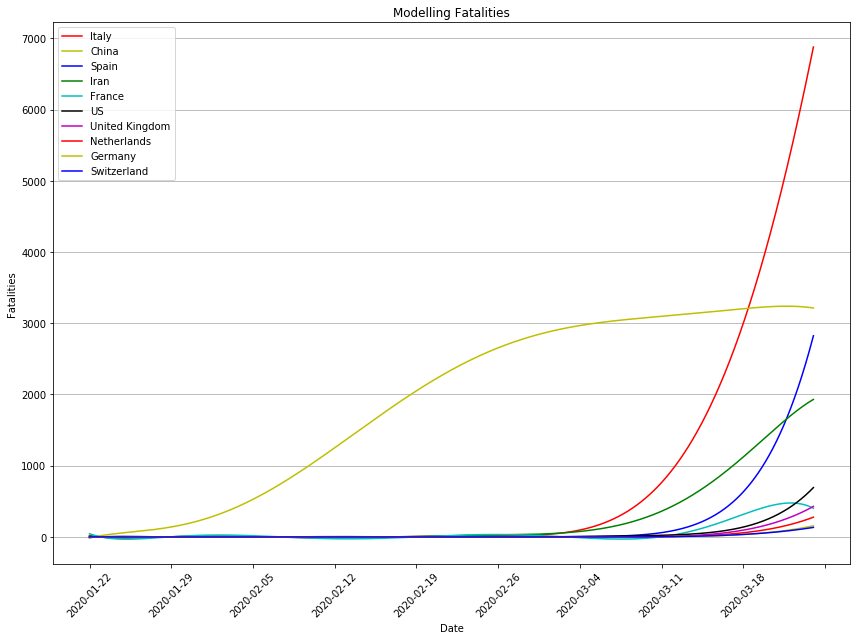

In [88]:
days_out = 63
n_days = days_out - 1   # adjust for index
degree = 7

fig, ax = plt.subplots(figsize = (12,9))
plt.title("Modelling Fatalities")
plt.xlabel("Date")
plt.ylabel("Fatalities")

xticks = [day*7 for day in days]
xlabels = dates[0::7]
plt.xticks(xticks, xlabels, rotation=45)

mcolor = ['r','y','b','g','c','k','m',
          'r','y','b','g','c','k','m',]
counter = 0
country_labels = ()

for country in fatalities_countries:
    y = top_fatalities_df.loc[top_fatalities_df.index == country].values[0]
    
    f_polynomial = np.poly1d(np.polyfit(days, y, degree))
    f_polyline = np.linspace(days[0], days[-1], 1000)
    plt.plot(f_polyline, f_polynomial(f_polyline), c = mcolor[counter], label = fatalities_countries)

    # Save poly scores and info to a dataframe
    print(f"Country: {country}")
    print(f"Model Score: {r2_score(y, f_polynomial(days))}")
    prediction = f_polynomial(n_days)
    print(f"Number of fatalities {n_days+1} days out will be {int(prediction)}.")
    
    country_labels += (country,)
    counter += 1
            
    if counter == len(fatalities_countries):
        break
        
plt.legend(country_labels, loc='best')            
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Population Density

In [69]:
pop_density_df = pop_density.join(confirmed_df, how='inner')
print(len(pop_density_df))
pop_density_df.head()

136


,Population Density,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,...,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24
Aruba,588.027778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Afghanistan,56.937760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,21.0,22.0,22.0,22.0,24.0,24.0,40.0,40.0,74.0
Albania,104.612263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42.0,51.0,55.0,59.0,64.0,70.0,76.0,89.0,104.0,123.0
Andorra,163.842553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,39.0,39.0,53.0,75.0,88.0,113.0,133.0,164.0
United Arab Emirates,135.609110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,...,98.0,98.0,98.0,113.0,140.0,140.0,153.0,153.0,198.0,248.0
